<a href="https://colab.research.google.com/github/Tutun03/project/blob/master/lyrics%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.15.0
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install nltk
!pip install clean-text[gpl]==0.4.0

In [ ]:
#dl packages
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
#ml packages
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
train_data =pd.read_csv("train.txt", header=None, sep=';', names=['Comment', 'Emotion'], encoding='utf-8')
#get all words length in comment
train_data['length']= [len(x) for x in train_data['Comment']]

In [ ]:
train_data

Comment            Emotion  \
0    Lost in the melody, letting music soothe my soul        tranquility   
1   Dancing through the pain, finding catharsis in...            release   
2   Standing tall in the face of adversity, refusi...           strength   
3   Tangled in a web of emotions, seeking clarity ...          confusion   
4    Embracing the silence, finding peace in solitude      introspection   
5   Fueled by passion, pursuing dreams with unwave...           ambition   
6   Captivated by the beauty of the world, finding...             wonder   
7   Balancing on the edge of uncertainty, embracin...         excitement   
8   Navigating the twists and turns of life, trust...         resilience   
9   Wrapped in a blanket of memories, finding sola...            comfort   
10  Diving into the depths of imagination, explori...         creativity   
11  Walking through the fire, emerging stronger on...       perseverance   
12        Lost in thought, pondering life's mysteries      contemplation   
13  Embracing the ebb and flow of emotions, riding...  emotionalfluidity   
14  Finding sanctuary in nature, connecting with t...           serenity   
15  Reaching for the stars, chasing dreams with re...           ambition   
16  Embracing vulnerability, opening my heart to l...           openness   
17  Finding strength in community, standing united...            support   
18  Touched by a random act of kindness, restoring...          gratitude   
19  Diving into the depths of introspection, unrav...      selfdiscovery   
20  Dancing through adversity, finding grace in re...          fortitude   
21  Drifting in the sea of uncertainty, navigating...              trust   
22  Reveling in the beauty of simplicity, finding ...        contentment   
23  Wandering through the labyrinth of life, seeki...     existentialism   
24  Basking in the glow of friendship, sharing lau...        camaraderie   
25  Entwined in the dance of fate, surrendering to...               fate   
26  Standing on the precipice of change, embracing...            renewal   
27  Lost in the echo of silence, finding solace in...      introspection   
28  Bathed in the warmth of acceptance, embracing ...     selfacceptance   
29  Confronting inner demons, finding courage in t...         resilience   

    length  
0       48  
1       55  
2       63  
3       62  
4       48  
5       64  
6       74  
7       73  
8       67  
9       61  
10      70  
11      61  
12      43  
13      66  
14      63  
15      62  
16      64  
17      60  
18      64  
19      74  
20      54  
21      61  
22      70  
23      68  
24      61  
25      78  
26      74  
27      55  
28      58  
29      65

In [ ]:
train_data.shape

(30, 3)

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
train_data.drop_duplicates(inplace=True)

In [ ]:
train_data['Emotion']

0           tranquility
1               release
2              strength
3             confusion
4         introspection
5              ambition
6                wonder
7            excitement
8            resilience
9               comfort
10           creativity
11         perseverance
12        contemplation
13    emotionalfluidity
14             serenity
15             ambition
16             openness
17              support
18            gratitude
19        selfdiscovery
20            fortitude
21                trust
22          contentment
23       existentialism
24          camaraderie
25                 fate
26              renewal
27        introspection
28       selfacceptance
29           resilience
Name: Emotion, dtype: object

In [ ]:
train_data['Emotion'].value_counts()

Emotion
introspection        2
ambition             2
resilience           2
tranquility          1
openness             1
renewal              1
fate                 1
camaraderie          1
existentialism       1
contentment          1
trust                1
fortitude            1
selfdiscovery        1
gratitude            1
support              1
emotionalfluidity    1
serenity             1
release              1
contemplation        1
perseverance         1
creativity           1
comfort              1
excitement           1
wonder               1
confusion            1
strength             1
selfacceptance       1
Name: count, dtype: int64

In [ ]:
sns.countplot(x=train_data['Emotion'])
plt.show()

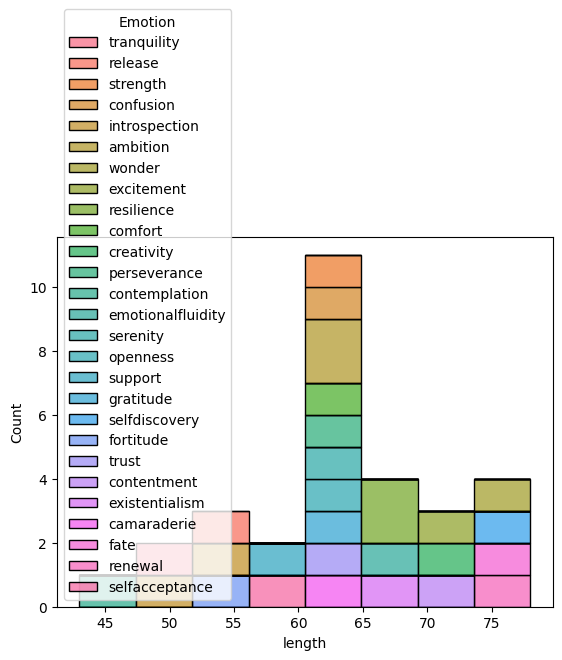

In [ ]:
# data distribution
df2=train_data.copy()
# Convert the length column to a numpy array
length_values=df2['length'].values
# Use sns.histplot instead of sns.kdeplot for simplicity
sns.histplot(data=df2, x='length', hue='Emotion', multiple='stack')
plt.show()

<ipython-input-19-75f5063fbc64>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


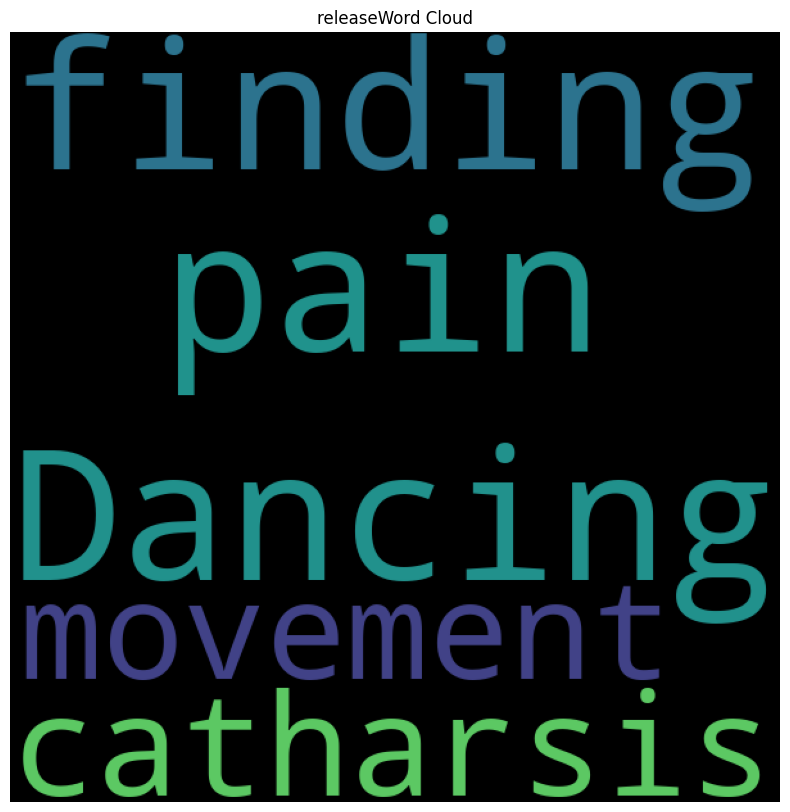

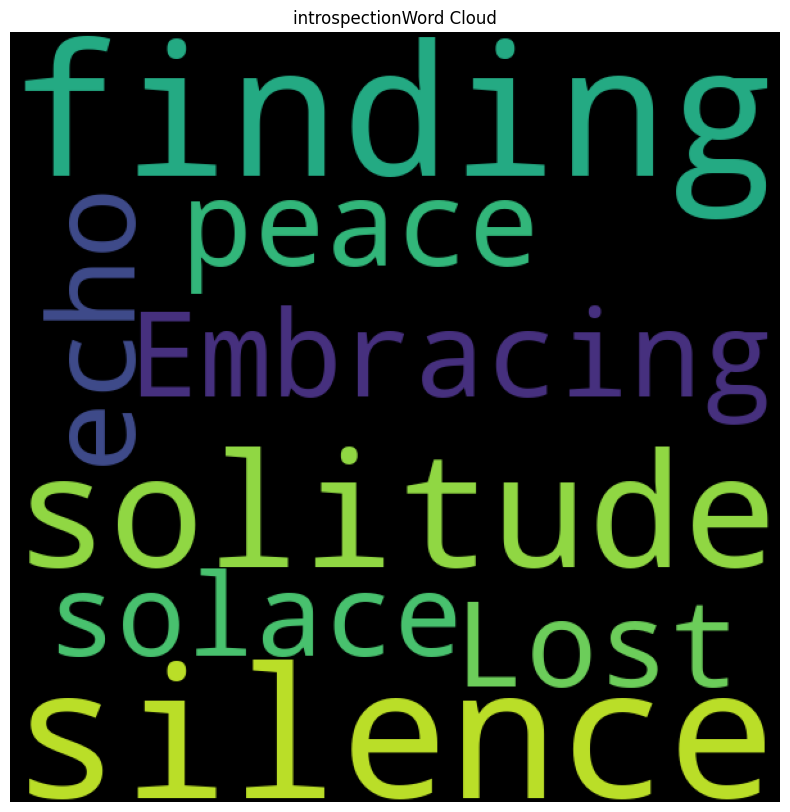

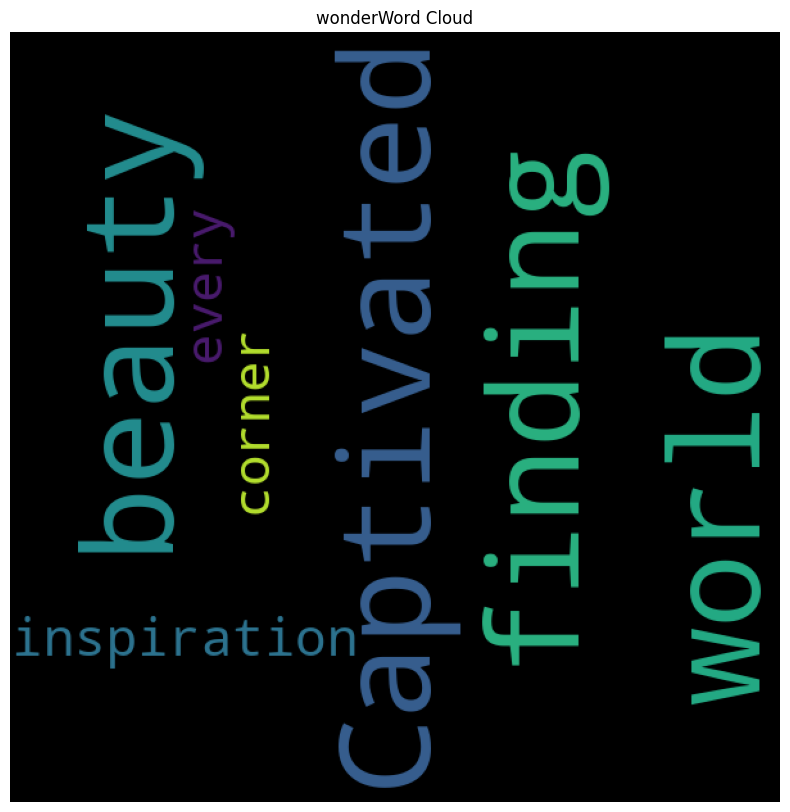

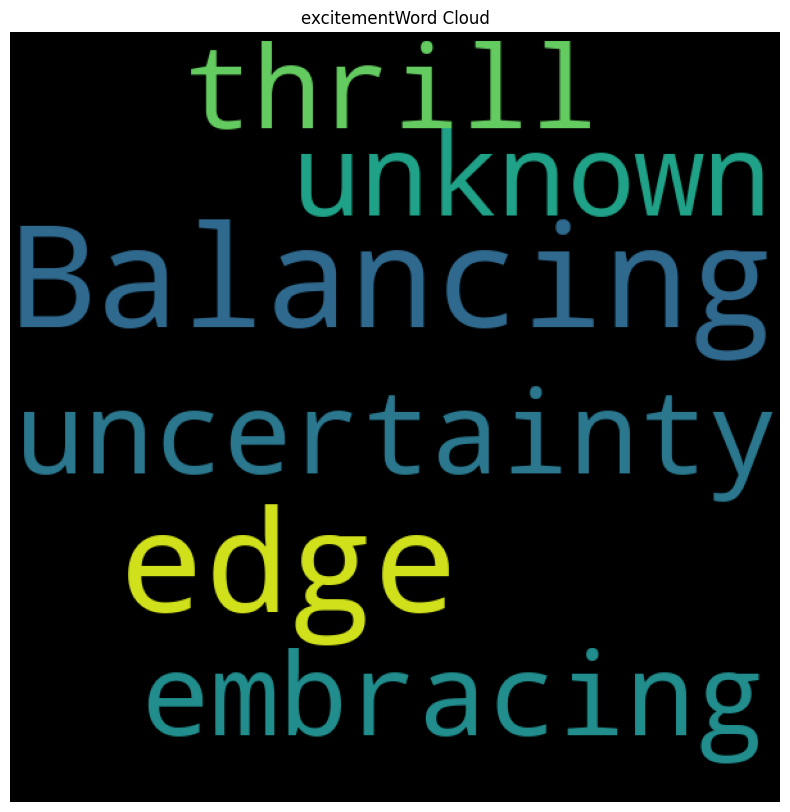

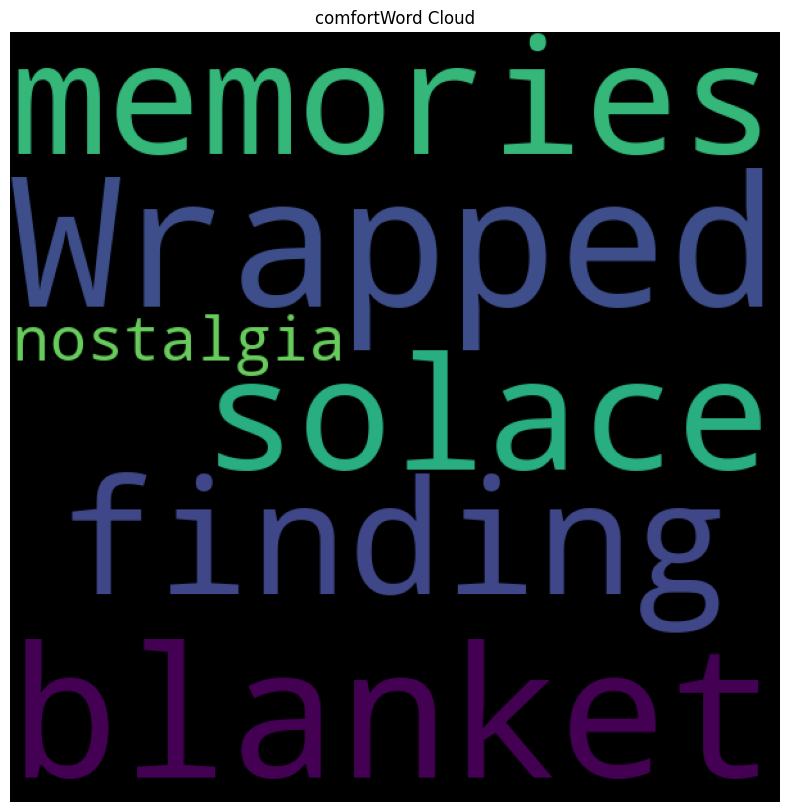

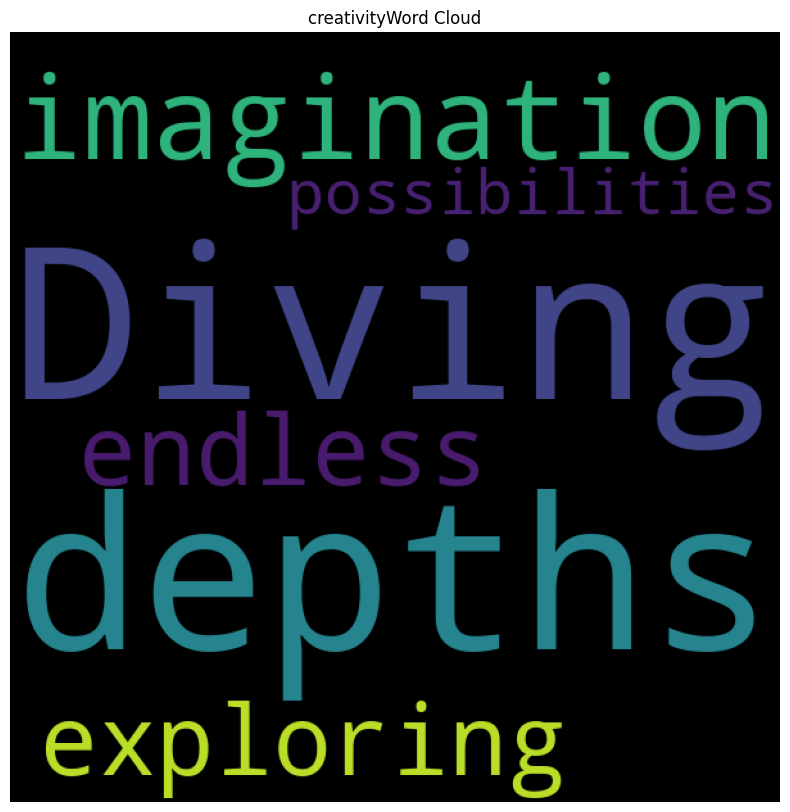

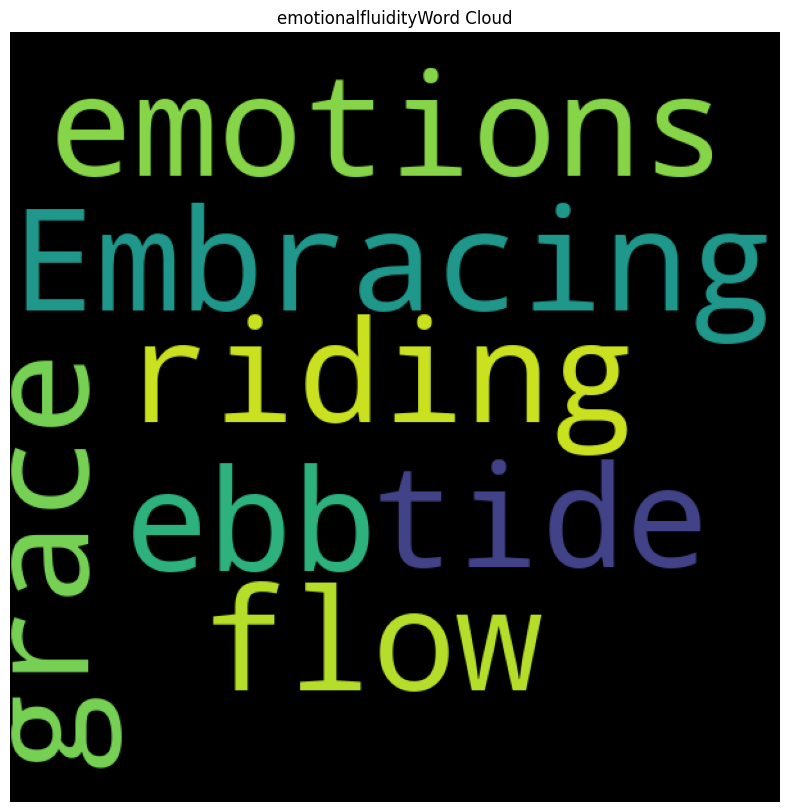

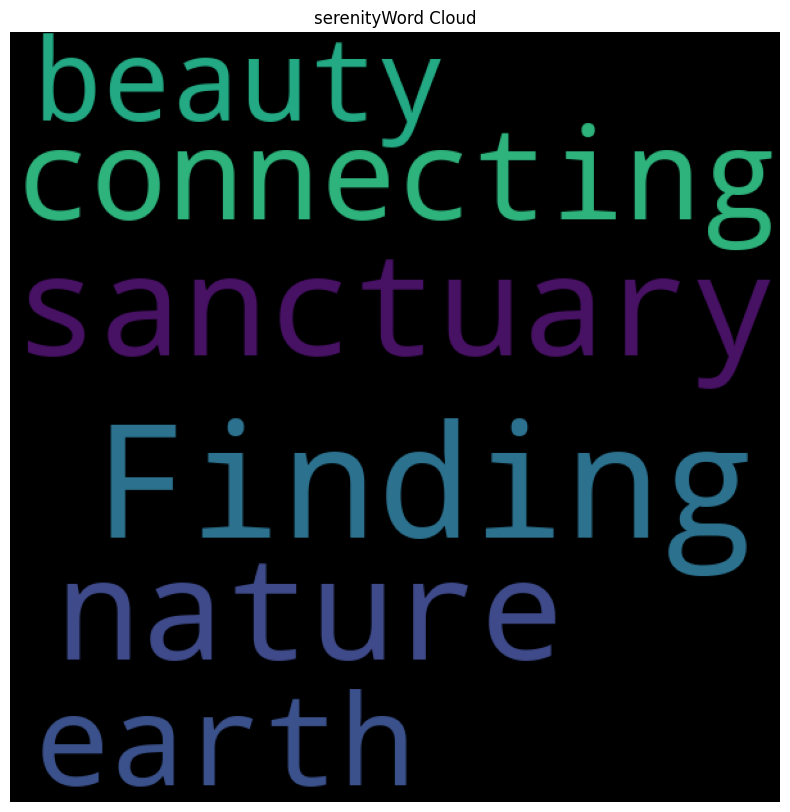

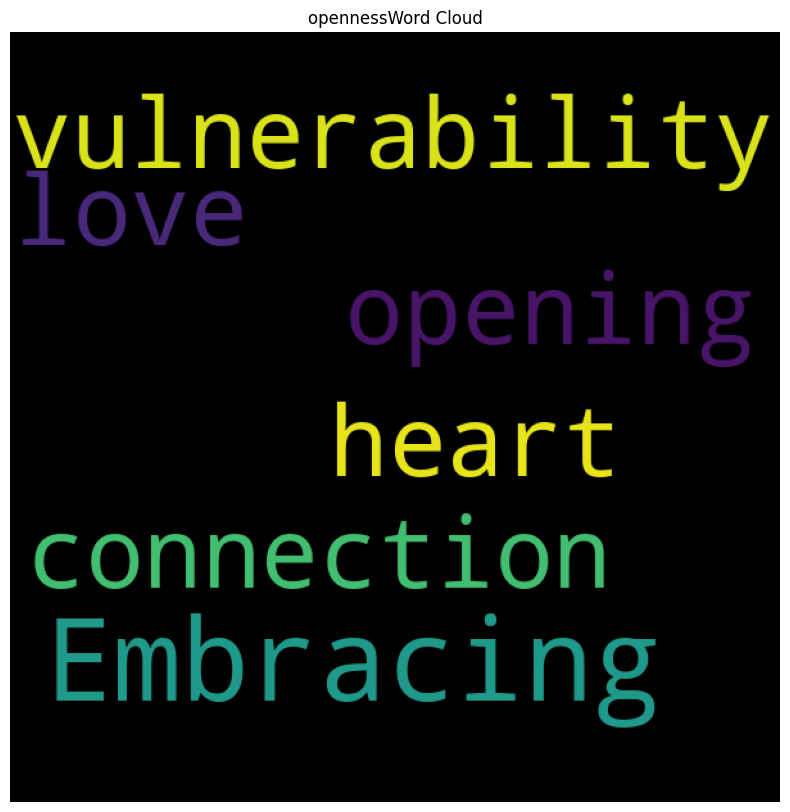

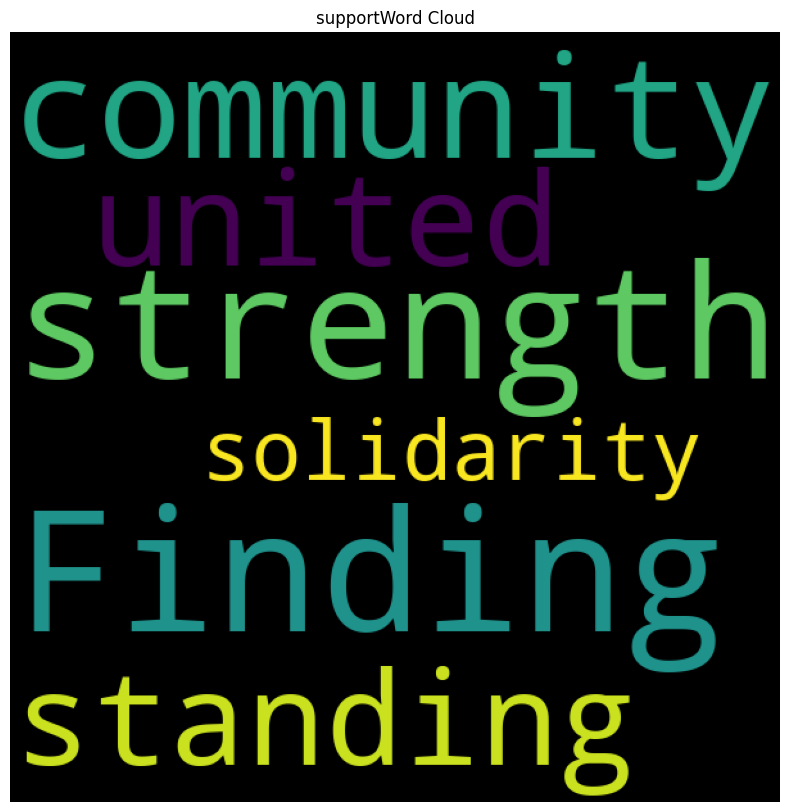

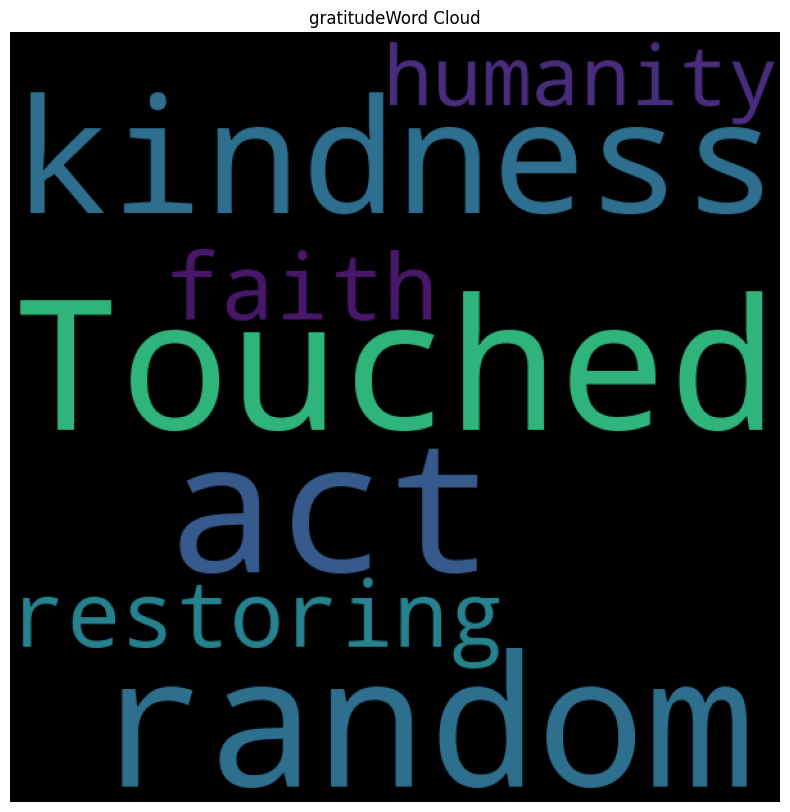

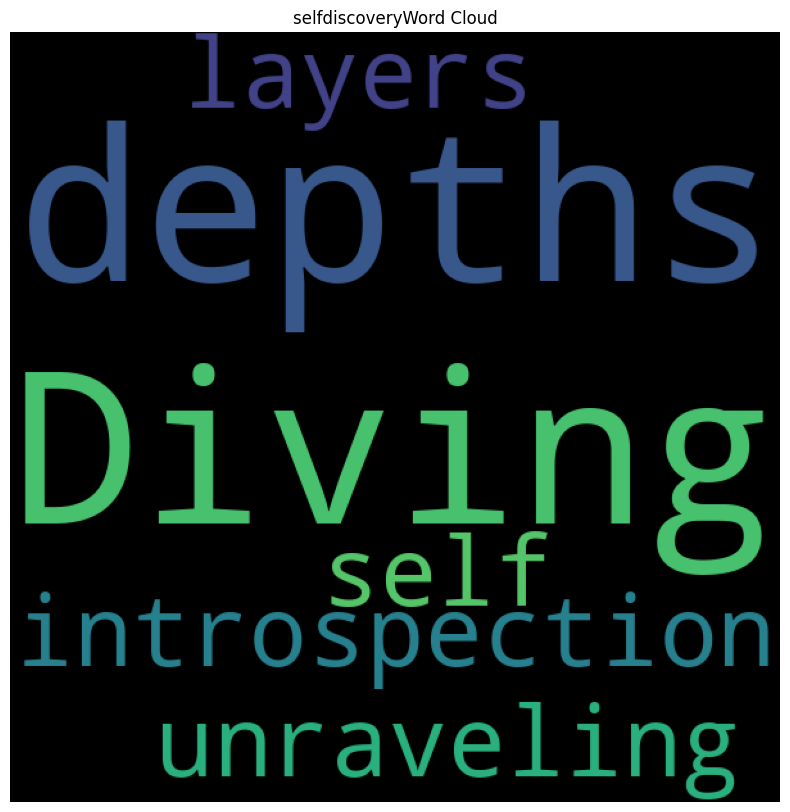

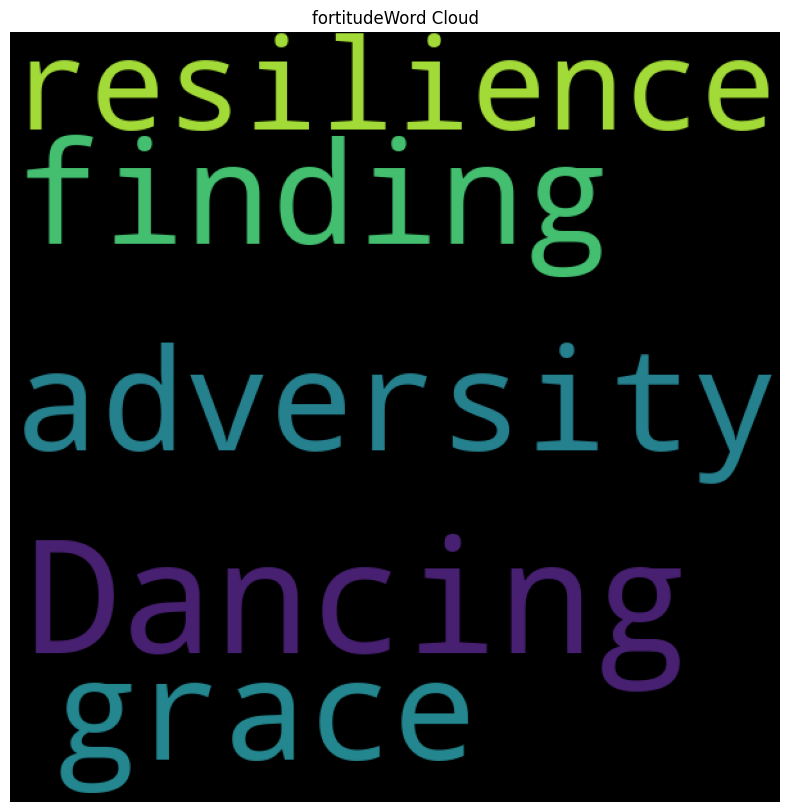

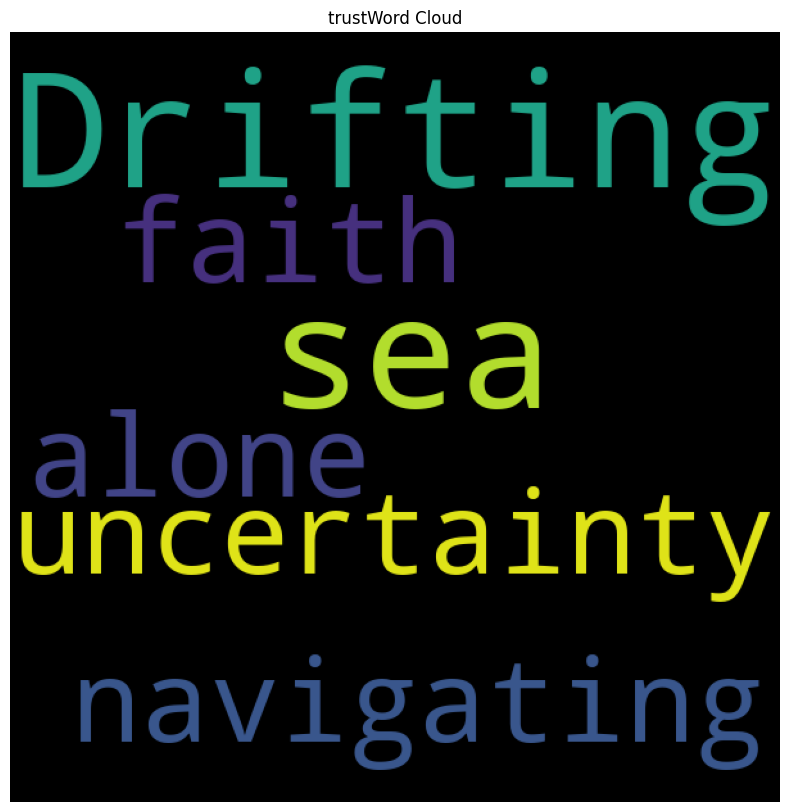

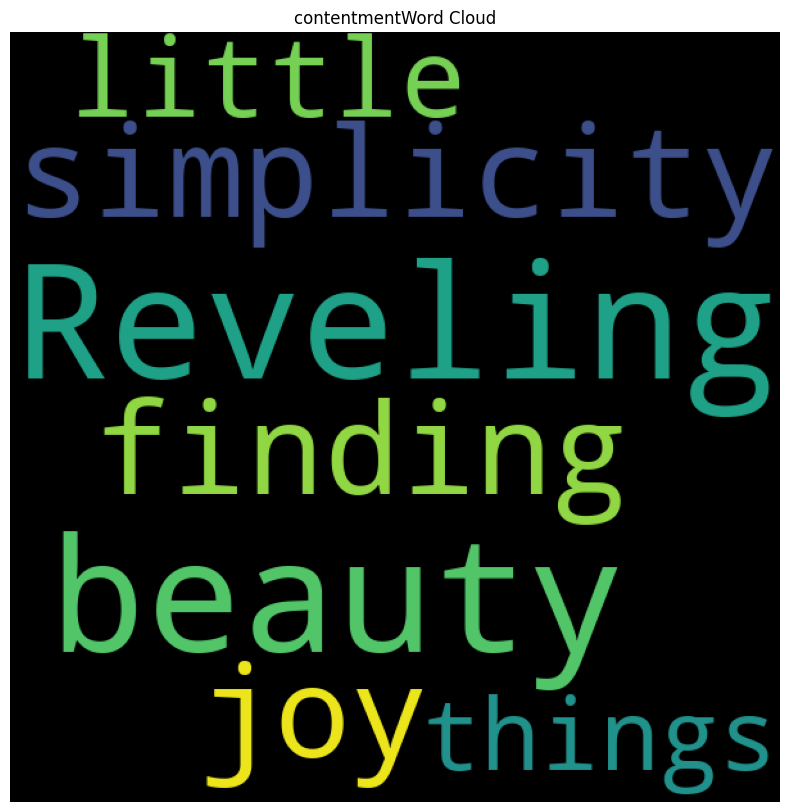

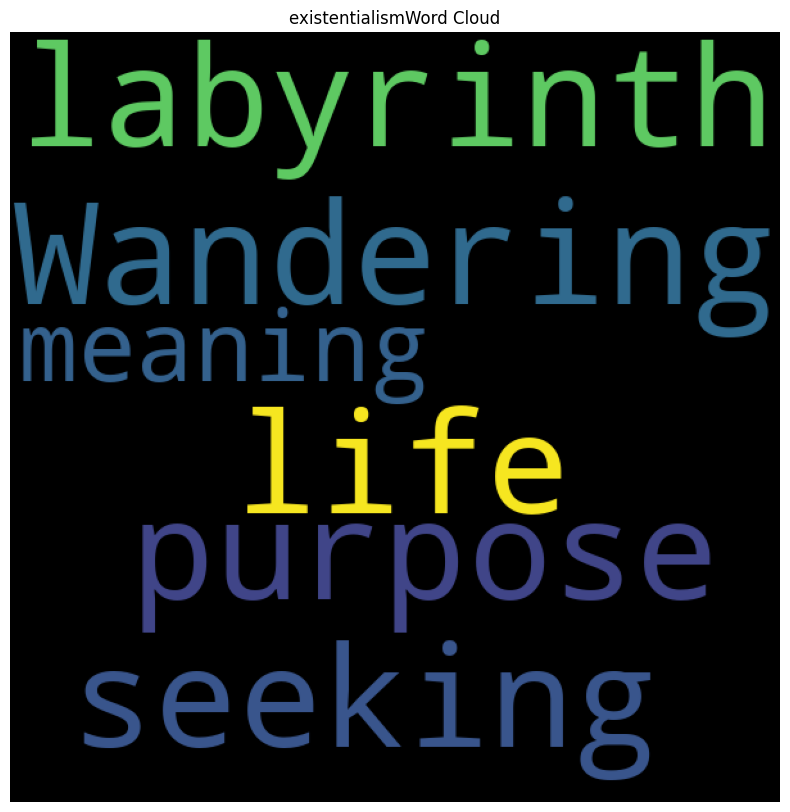

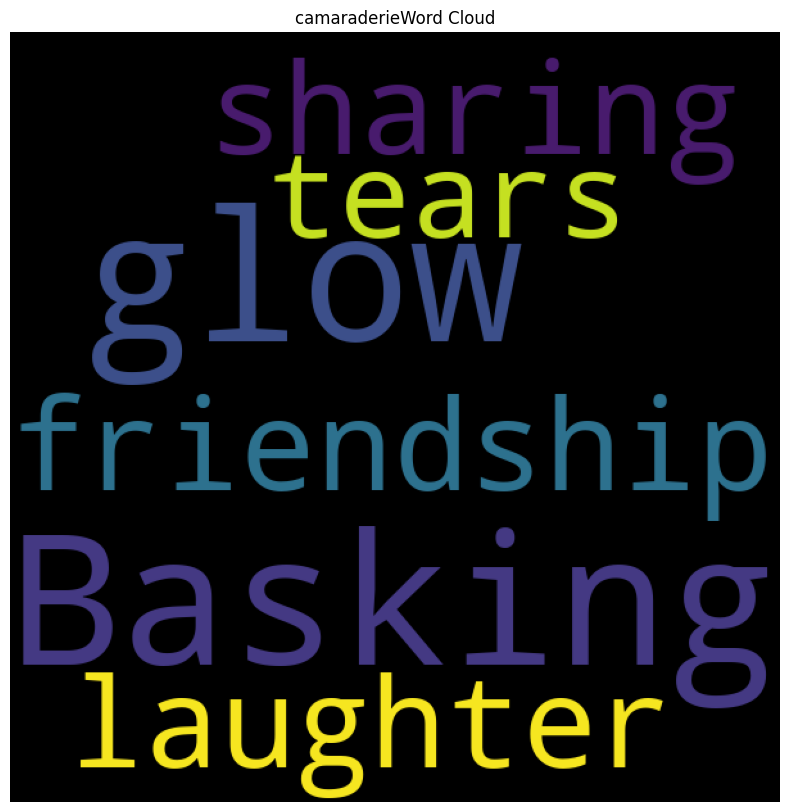

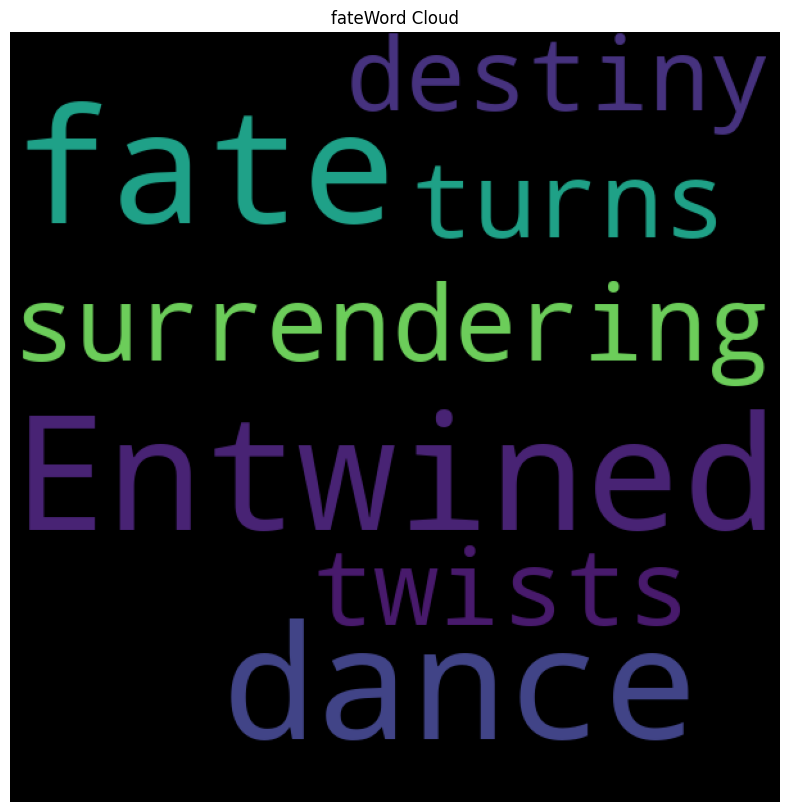

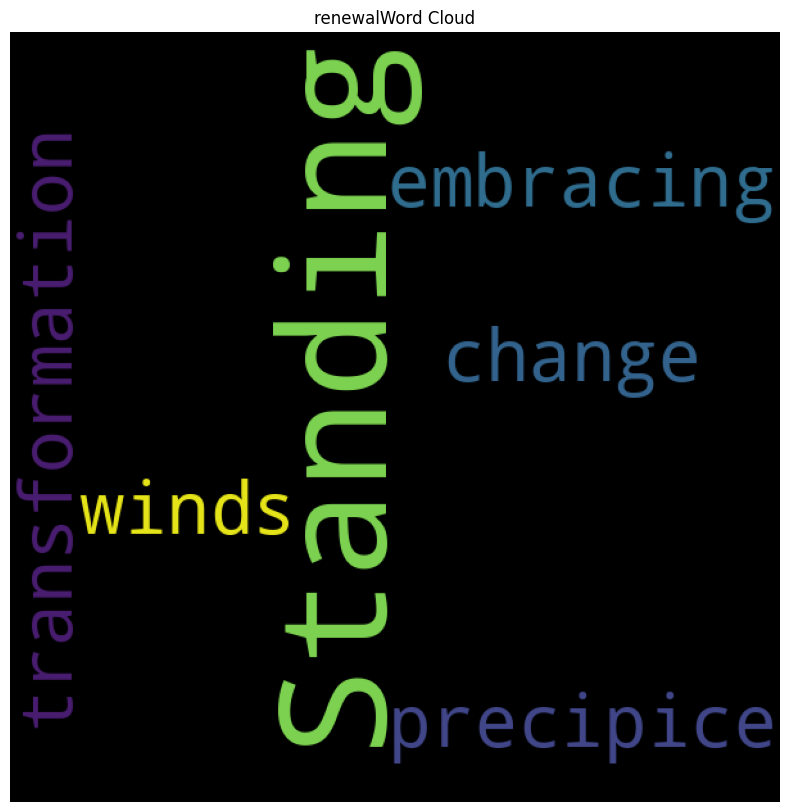

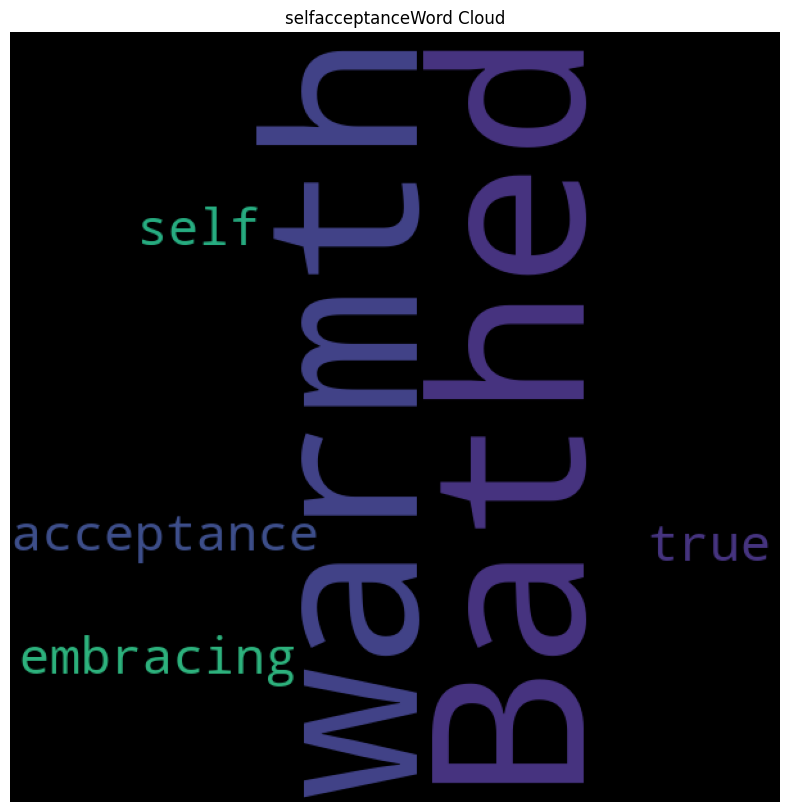

In [ ]:
def words_cloud(wordcloud, emotion):
    plt.figure(figsize=(10,10))
    plt.title(emotion+"Word Cloud")
    plt.imshow(wordcloud)
    plt.axis("off")

emotions_list = train_data['Emotion'].unique()
for emotion in emotions_list:
   text= " ".join([sentence for sentence in train_data.loc[train_data['Emotion']==emotion, 'Comment']])
   wordcloud = WordCloud(width=600, height=600).generate(text)
   words_cloud(wordcloud, emotion)

In [ ]:
lb = LabelEncoder()
train_data['Emotion_Encoded'] = lb.fit_transform(train_data['Emotion'])

In [ ]:
train_data

Comment            Emotion  \
0    Lost in the melody, letting music soothe my soul        tranquility   
1   Dancing through the pain, finding catharsis in...            release   
2   Standing tall in the face of adversity, refusi...           strength   
3   Tangled in a web of emotions, seeking clarity ...          confusion   
4    Embracing the silence, finding peace in solitude      introspection   
5   Fueled by passion, pursuing dreams with unwave...           ambition   
6   Captivated by the beauty of the world, finding...             wonder   
7   Balancing on the edge of uncertainty, embracin...         excitement   
8   Navigating the twists and turns of life, trust...         resilience   
9   Wrapped in a blanket of memories, finding sola...            comfort   
10  Diving into the depths of imagination, explori...         creativity   
11  Walking through the fire, emerging stronger on...       perseverance   
12        Lost in thought, pondering life's mysteries      contemplation   
13  Embracing the ebb and flow of emotions, riding...  emotionalfluidity   
14  Finding sanctuary in nature, connecting with t...           serenity   
15  Reaching for the stars, chasing dreams with re...           ambition   
16  Embracing vulnerability, opening my heart to l...           openness   
17  Finding strength in community, standing united...            support   
18  Touched by a random act of kindness, restoring...          gratitude   
19  Diving into the depths of introspection, unrav...      selfdiscovery   
20  Dancing through adversity, finding grace in re...          fortitude   
21  Drifting in the sea of uncertainty, navigating...              trust   
22  Reveling in the beauty of simplicity, finding ...        contentment   
23  Wandering through the labyrinth of life, seeki...     existentialism   
24  Basking in the glow of friendship, sharing lau...        camaraderie   
25  Entwined in the dance of fate, surrendering to...               fate   
26  Standing on the precipice of change, embracing...            renewal   
27  Lost in the echo of silence, finding solace in...      introspection   
28  Bathed in the warmth of acceptance, embracing ...     selfacceptance   
29  Confronting inner demons, finding courage in t...         resilience   

    length  Emotion_Encoded  
0       48               24  
1       55               16  
2       63               22  
3       62                3  
4       48               13  
5       64                0  
6       74               26  
7       73                8  
8       67               18  
9       61                2  
10      70                6  
11      61               15  
12      43                4  
13      66                7  
14      63               21  
15      62                0  
16      64               14  
17      60               23  
18      64               12  
19      74               20  
20      54               11  
21      61               25  
22      70                5  
23      68                9  
24      61                1  
25      78               10  
26      74               17  
27      55               13  
28      58               19  
29      65               18

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=train_data.copy()

In [ ]:
df

Comment            Emotion  \
0    Lost in the melody, letting music soothe my soul        tranquility   
1   Dancing through the pain, finding catharsis in...            release   
2   Standing tall in the face of adversity, refusi...           strength   
3   Tangled in a web of emotions, seeking clarity ...          confusion   
4    Embracing the silence, finding peace in solitude      introspection   
5   Fueled by passion, pursuing dreams with unwave...           ambition   
6   Captivated by the beauty of the world, finding...             wonder   
7   Balancing on the edge of uncertainty, embracin...         excitement   
8   Navigating the twists and turns of life, trust...         resilience   
9   Wrapped in a blanket of memories, finding sola...            comfort   
10  Diving into the depths of imagination, explori...         creativity   
11  Walking through the fire, emerging stronger on...       perseverance   
12        Lost in thought, pondering life's mysteries      contemplation   
13  Embracing the ebb and flow of emotions, riding...  emotionalfluidity   
14  Finding sanctuary in nature, connecting with t...           serenity   
15  Reaching for the stars, chasing dreams with re...           ambition   
16  Embracing vulnerability, opening my heart to l...           openness   
17  Finding strength in community, standing united...            support   
18  Touched by a random act of kindness, restoring...          gratitude   
19  Diving into the depths of introspection, unrav...      selfdiscovery   
20  Dancing through adversity, finding grace in re...          fortitude   
21  Drifting in the sea of uncertainty, navigating...              trust   
22  Reveling in the beauty of simplicity, finding ...        contentment   
23  Wandering through the labyrinth of life, seeki...     existentialism   
24  Basking in the glow of friendship, sharing lau...        camaraderie   
25  Entwined in the dance of fate, surrendering to...               fate   
26  Standing on the precipice of change, embracing...            renewal   
27  Lost in the echo of silence, finding solace in...      introspection   
28  Bathed in the warmth of acceptance, embracing ...     selfacceptance   
29  Confronting inner demons, finding courage in t...         resilience   

    length  Emotion_Encoded  
0       48               24  
1       55               16  
2       63               22  
3       62                3  
4       48               13  
5       64                0  
6       74               26  
7       73                8  
8       67               18  
9       61                2  
10      70                6  
11      61               15  
12      43                4  
13      66                7  
14      63               21  
15      62                0  
16      64               14  
17      60               23  
18      64               12  
19      74               20  
20      54               11  
21      61               25  
22      70                5  
23      68                9  
24      61                1  
25      78               10  
26      74               17  
27      55               13  
28      58               19  
29      65               18

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download the stopwords corpus
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]"," ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)
clean_text("I am 23432 % loveing hating, hated, loved")
# Assuming df is your DataFrame and 'Comment' is the column containing text data
# Replace 'df' and 'Comment' with your actual DataFrame and column name
df['cleaned_comment'] = df['Comment'].apply(clean_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

Comment            Emotion  \
0    Lost in the melody, letting music soothe my soul        tranquility   
1   Dancing through the pain, finding catharsis in...            release   
2   Standing tall in the face of adversity, refusi...           strength   
3   Tangled in a web of emotions, seeking clarity ...          confusion   
4    Embracing the silence, finding peace in solitude      introspection   
5   Fueled by passion, pursuing dreams with unwave...           ambition   
6   Captivated by the beauty of the world, finding...             wonder   
7   Balancing on the edge of uncertainty, embracin...         excitement   
8   Navigating the twists and turns of life, trust...         resilience   
9   Wrapped in a blanket of memories, finding sola...            comfort   
10  Diving into the depths of imagination, explori...         creativity   
11  Walking through the fire, emerging stronger on...       perseverance   
12        Lost in thought, pondering life's mysteries      contemplation   
13  Embracing the ebb and flow of emotions, riding...  emotionalfluidity   
14  Finding sanctuary in nature, connecting with t...           serenity   
15  Reaching for the stars, chasing dreams with re...           ambition   
16  Embracing vulnerability, opening my heart to l...           openness   
17  Finding strength in community, standing united...            support   
18  Touched by a random act of kindness, restoring...          gratitude   
19  Diving into the depths of introspection, unrav...      selfdiscovery   
20  Dancing through adversity, finding grace in re...          fortitude   
21  Drifting in the sea of uncertainty, navigating...              trust   
22  Reveling in the beauty of simplicity, finding ...        contentment   
23  Wandering through the labyrinth of life, seeki...     existentialism   
24  Basking in the glow of friendship, sharing lau...        camaraderie   
25  Entwined in the dance of fate, surrendering to...               fate   
26  Standing on the precipice of change, embracing...            renewal   
27  Lost in the echo of silence, finding solace in...      introspection   
28  Bathed in the warmth of acceptance, embracing ...     selfacceptance   
29  Confronting inner demons, finding courage in t...         resilience   

    length  Emotion_Encoded                               cleaned_comment  
0       48               24              lost melodi let music sooth soul  
1       55               16              danc pain find catharsi movement  
2       63               22           stand tall face advers refus defeat  
3       62                3       tangl web emot seek clariti amidst chao  
4       48               13               embrac silenc find peac solitud  
5       64                0       fuel passion pursu dream unwav determin  
6       74               26  captiv beauti world find inspir everi corner  
7       73                8  balanc edg uncertainti embrac thrill unknown  
8       67               18        navig twist turn life trust path ahead  
9       61                2      wrap blanket memori find solac nostalgia  
10      70                6      dive depth imagin explor endless possibl  
11      61               15                 walk fire emerg stronger side  
12      43                4              lost thought ponder life mysteri  
13      66                7          embrac ebb flow emot ride tide grace  
14      63               21     find sanctuari natur connect earth beauti  
15      62                0     reach star chase dream relentless passion  
16      64               14         embrac vulner open heart love connect  
17      60               23       find strength commun stand unit solidar  
18      64               12      touch random act kind restor faith human  
19      74               20      dive depth introspect unravel layer self  
20      54               11                 danc advers find grace resili  
21      61       

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'],df['Emotion_Encoded'],test_size=0.2,random_state=42)

In [ ]:
X_train

28             bath warmth accept embrac true self
24        bask glow friendship share laughter tear
12                lost thought ponder life mysteri
0                 lost melodi let music sooth soul
4                  embrac silenc find peac solitud
16           embrac vulner open heart love connect
5          fuel passion pursu dream unwav determin
13            embrac ebb flow emot ride tide grace
11                   walk fire emerg stronger side
22       revel beauti simplic find joy littl thing
1                 danc pain find catharsi movement
2              stand tall face advers refus defeat
25     entwin danc fate surrend twist turn destini
3          tangl web emot seek clariti amidst chao
21          drift sea uncertainti navig faith alon
26      stand precipic chang embrac wind transform
18        touch random act kind restor faith human
29      confront inner demon find courag face dark
20                   danc advers find grace resili
7     balanc edg uncertainti em

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}
for name, clf in classifiers.items():
    print(f"\n================{name}==================")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)

    print(f"\nAccuracy using TF-IDF: {accuracy_score(y_test, y_pred_tfidf)}")
    print("Classification Report:")
    print(classification_report(y_test,y_pred_tfidf))


================Multinomial Naive Bayes==================

Accuracy using TF-IDF: 0.3333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.20      0.20      0.20         6
weighted avg       0.33      0.33      0.33         6


================Logistic Regression==================

Accuracy using TF-IDF: 0.3333333333333333
Classification Rep

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Accuracy using TF-IDF: 0.3333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          18       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.22      0.22      0.22         6
weighted avg       0.33      0.33      0.33         6


================Support Vector Machine==================

Accuracy using TF-IDF: 0.3333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
lg=LogisticRegression()
lg.fit(X_train_tfidf, y_train)
y_pred_lg = lg.predict(X_train_tfidf)

In [ ]:
def predict_catagory(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized=tfidf_vectorizer.transform([cleaned_text])

    predicted_label=lg.predict(input_vectorized)[0]
    predicted_catagory=lb.inverse_transform([predicted_label])[0]
    label= np.max(lg.predict(input_vectorized)[0])

    return predict_catagory, label

sentences=["Yesterday, all my troubles seemed so far away.",
           "Hello darkness, my old friend, I've come to talk with you again.",
           "And I will try to fix you.",
           "And I will try to fix you.",
            "And I will always love you",
           "So what, I'm still a rock star, I got my rock moves, and I don't need you." ,
           "I hope you know, I hope you know that this has nothing to do with you."
          ]
for sent in sentences:
    print(sent)
    predict_catagory, label=predict_catagory(sent)
    print("predicted catagory :", predict_catagory)
    print("Predicted Label :", label)
    print("================================================")

Yesterday, all my troubles seemed so far away.
predicted catagory : <function predict_catagory at 0x7f4243779240>
Predicted Label : 15
Hello darkness, my old friend, I've come to talk with you again.
predicted catagory : <function predict_catagory at 0x7f4243779240>
Predicted Label : 18
And I will try to fix you.
predicted catagory : <function predict_catagory at 0x7f4243779240>
Predicted Label : 15
And I will try to fix you.
predicted catagory : <function predict_catagory at 0x7f4243779240>
Predicted Label : 15
And I will always love you
predicted catagory : <function predict_catagory at 0x7f4243779240>
Predicted Label : 14
So what, I'm still a rock star, I got my rock moves, and I don't need you.
predicted catagory : <function predict_catagory at 0x7f4243779240>
Predicted Label : 15
I hope you know, I hope you know that this has nothing to do with you.
predicted catagory : <function predict_catagory at 0x7f4243779240>
Predicted Label : 15


In [ ]:
import pickle
pickle.dump(lg, open("logistic_regression.pkl", 'wb'))
pickle.dump(lb, open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer, open("tfidf_vectorizer.pkl",'wb'))


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
stopwords=set(nltk.corpus.stopwords.words('english'))

In [ ]:
def clean_text(df, column,vocab_size, max_len):
    stemmer = PorterStemmer()

    corpus = []
    for text in df[column]:
        text=re.sub("[^a-aA-Z]",' ',text)
        text=text.lower()
        text=text.split()
        text=[stemmer.stem(w) for w in text if w not in stopwords]
        text=" ".join(text)
        corpus.append(text)

    one_hot_word=[one_hot(input_text=word,n=vocab_size) for word in corpus]
    pad=pad_sequences(sequences=one_hot_word, maxlen= max_len, padding='pre')
    return pad


In [ ]:
x_train = clean_text(train_data,'Comment', vocab_size=11000, max_len=300)

In [ ]:
x_train

array([[   0,    0,    0, ...,    0,    0, 7436],
       [   0,    0,    0, ...,    0,    0, 5364],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0, 7436],
       [   0,    0,    0, ...,    0,    0, 1192],
       [   0,    0,    0, ...,    0,    0, 4582]], dtype=int32)

In [ ]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [ ]:
train_data

Comment  Emotion  length  \
0    Lost in the melody, letting music soothe my soul       24      48   
1   Dancing through the pain, finding catharsis in...       16      55   
2   Standing tall in the face of adversity, refusi...       22      63   
3   Tangled in a web of emotions, seeking clarity ...        3      62   
4    Embracing the silence, finding peace in solitude       13      48   
5   Fueled by passion, pursuing dreams with unwave...        0      64   
6   Captivated by the beauty of the world, finding...       26      74   
7   Balancing on the edge of uncertainty, embracin...        8      73   
8   Navigating the twists and turns of life, trust...       18      67   
9   Wrapped in a blanket of memories, finding sola...        2      61   
10  Diving into the depths of imagination, explori...        6      70   
11  Walking through the fire, emerging stronger on...       15      61   
12        Lost in thought, pondering life's mysteries        4      43   
13  Embracing the ebb and flow of emotions, riding...        7      66   
14  Finding sanctuary in nature, connecting with t...       21      63   
15  Reaching for the stars, chasing dreams with re...        0      62   
16  Embracing vulnerability, opening my heart to l...       14      64   
17  Finding strength in community, standing united...       23      60   
18  Touched by a random act of kindness, restoring...       12      64   
19  Diving into the depths of introspection, unrav...       20      74   
20  Dancing through adversity, finding grace in re...       11      54   
21  Drifting in the sea of uncertainty, navigating...       25      61   
22  Reveling in the beauty of simplicity, finding ...        5      70   
23  Wandering through the labyrinth of life, seeki...        9      68   
24  Basking in the glow of friendship, sharing lau...        1      61   
25  Entwined in the dance of fate, surrendering to...       10      78   
26  Standing on the precipice of change, embracing...       17      74   
27  Lost in the echo of silence, finding solace in...       13      55   
28  Bathed in the warmth of acceptance, embracing ...       19      58   
29  Confronting inner demons, finding courage in t...       18      65   

    Emotion_Encoded  
0                24  
1                16  
2                22  
3                 3  
4                13  
5                 0  
6                26  
7                 8  
8                18  
9                 2  
10                6  
11               15  
12                4  
13                7  
14               21  
15                0  
16               14  
17               23  
18               12  
19               20  
20               11  
21               25  
22                5  
23                9  
24                1  
25               10  
26               17  
27               13  
28               19  
29               18

In [ ]:
y_train=to_categorical(train_data['Emotion'])

In [ ]:


# Example data
x_train = np.random.randint(0, 11000, size=(1000, 300))  # Example input data (random)
y_train = np.random.randint(0, 6, size=(1000,))  # Example labels (random)

# Preprocessing
max_length = 300  # Max length of input sequences
num_classes = 6  # Number of classes

# Pad sequences if needed
x_train = pad_sequences(x_train, maxlen=max_length)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=num_classes)

# Model definition
model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=max_length))
model.add(Dropout(0.2))
model.add(LSTM(12))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with num_classes units

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=64, verbose=1)


Epoch 1/3
16/16 [==============================] - 10s 276ms/step - loss: 1.9087 - accuracy: 0.1640
Epoch 2/3
16/16 [==============================] - 3s 200ms/step - loss: 1.8452 - accuracy: 0.1640
Epoch 3/3
16/16 [==============================] - 3s 188ms/step - loss: 1.8087 - accuracy: 0.1920


In [ ]:
def pred(text):
    stemmer = PorterStemmer()
    corpus=[]
    text=re.sub("[^a-zA-Z]"," ", text)
    text=text.lower()
    text=text.split()
    text=[stemmer.stem(w) for w in text if w not in stopwords]
    text=" ".join(text)
    corpus.append(text)

    one_hot_word= [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

sentences = [
 "And I will try to fix you.",
           "And I will try to fix you.",
            "And I will always love you",
           "So what, I'm still a rock star, I got my rock moves, and I don't need you."
]
for sent in sentences:
    clean_sent=pred(sent)
    emotion=lb.inverse_transform(np.argmax(model.predict(clean_sent),axis=-1))[0]
    label=np.max(model.predict(clean_sent))
    print(emotion)
    print(label)
    print("=====================================")

1/1 [==============================] - 0s 99ms/step
contemplation
0.18549463
1/1 [==============================] - 0s 60ms/step
contemplation
0.18549463
1/1 [==============================] - 0s 70ms/step
contemplation
0.18610579
1/1 [==============================] - 0s 78ms/step
contemplation
0.17926177


In [ ]:
model.save('model.h5')

NameError: name 'model' is not defined

In [ ]:
!pip install streamlit numpy nltk scikit-learn pyngrok

import streamlit as st
import numpy as np
import re
from nltk.stem import PorterStemmer
import pickle
import nltk
import warnings

# Ignore specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Download NLTK stopwords
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Loading the saved files (replace filenames with your actual paths)
lg = pickle.load(open('logistic_regression.pkl','rb'))
tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl','rb'))
lb = pickle.load(open('label_encoder.pkl','rb'))

# Repeating the same functions
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict emotion
    predicted_label = lg.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label =  np.max(lg.predict(input_vectorized))

    return predicted_emotion, label

# Streamlit app
st.title("Six Human Emotions Detection App")

# User input
user_input = st.text_input("Enter your text here:")

if st.button("Predict"):
    predicted_emotion, label = predict_emotion(user_input)
    st.write("Predicted Emotion:", predicted_emotion)
    st.write("Probability:", label)







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
